# Image Classification on a custom dataset

In this notebook we perform a cat-dog image classification task using a CNN. The dataset of images is huge and quite representative of a real-world dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# We can't possibly read and keep > 1GB of data at once. So we can use ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator 

# This class also manipulates images by rotating, shifting, shearing, flipping, etc
image_gen = ImageDataGenerator(rotation_range = 30,        # Randomly rotate images by how many degrees
                               width_shift_range = 0.1,    # Randomly resize width of images by how much %
                               height_shift_range = 0.1,   # Randomly resize height of images by how much %
                               rescale = 1/255,            # Normalizing to 0-1
                               shear_range = 0.2,          # Cut away a part of image (shear)
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = False,      # We don't need this for this application
                               fill_mode = 'nearest')      # Fill in any missing pixels with 'nearest'


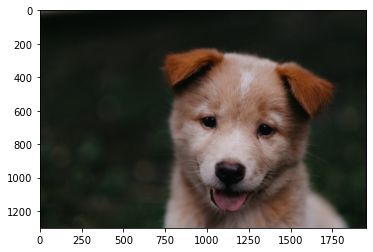

In [4]:
dog = cv2.imread('./DATA/00-puppy.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

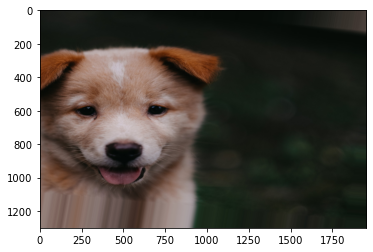

In [5]:
plt.imshow(image_gen.random_transform(dog))

In [6]:
image_gen.flow_from_directory('../CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [8]:
input_shape = (150, 150, 3) # Keras will automatically resize images to this size during flow_from_directory

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(rate = 0.5))  # How much % neurons to turn OFF during training, to reduce overfitting

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________

In [10]:
batch_size = 16

train_image_generator = image_gen.flow_from_directory('../CATS_DOGS/train',
                                                      target_size = input_shape[:2], # NOTICE this: input_shape[:2]
                                                      batch_size = batch_size, 
                                                      class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [11]:
test_image_generator = image_gen.flow_from_directory('../CATS_DOGS/test',
                                                     target_size = input_shape[:2],
                                                     batch_size = batch_size, 
                                                     class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [12]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [29]:
results = model.fit_generator(train_image_generator, 
                              epochs = 1,
                              steps_per_epoch = 150, 
                              validation_data = test_image_generator,
                              validation_steps = 12)

Epoch 1/1
200/200 [==============================] - 368s 2s/step - loss: 0.6995 - accuracy: 0.5331 - val_loss: 0.5590 - val_accuracy: 0.6094


In [31]:
from keras.models import load_model

cat_dog_classifier = load_model('./06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

from keras.preprocessing import image

new_img_dog = image.load_img('../CATS_DOGS/test/DOG/10000.jpg', target_size = (150, 150, 3))
new_img_dog = image.img_to_array(new_img_dog)
new_img_dog = new_img_dog / 255

new_img_cat = image.load_img('../CATS_DOGS/test/CAT/10059.jpg', target_size = (150, 150, 3))
new_img_cat = image.img_to_array(new_img_cat)
new_img_cat = new_img_cat / 255

# Convert to "batch"
batch_dog = np.expand_dims(new_img_dog, axis = 0)
batch_cat = np.expand_dims(new_img_cat, axis = 0)
print(batch_dog.shape)

(1, 150, 150, 3)


In [32]:
prediction = model.predict_classes(batch_dog)
if prediction[0][0] == [[1]]:
    print("Model predicts Dog")
else: 
    print("Model predicts Cat")

print(f'Confidence = {model.predict(batch_dog)}') # Confidence of prediction

Model predicts Dog
Confidence = [[0.5262585]]


In [33]:
prediction = model.predict_classes(batch_cat)
if prediction[0][0] == [[1]]:
    print("Model predicts Dog")
else: 
    print("Model predicts Cat")

print(f'Confidence = {model.predict(batch_cat)}') # Confidence of prediction

Model predicts Dog
Confidence = [[0.506129]]
